0.407154211736
0.385457980683
0.369234211345
0.36611496141
0.388772288406


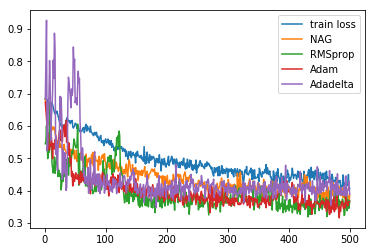

In [8]:
# write your code here
from sklearn.datasets import load_svmlight_file
from numpy import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random


#sigmoid函数
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

#只对数组索引进行随机排序
def shuffle_data_index(data_size):
    arr_index = []
    for i in range(data_size):
        arr_index.append(i)
    random.shuffle (arr_index)
    return arr_index

#loss函数
def loss(y,h):
#     print("-(",y,"*","log(",h,")+(1-",y,")*log(1-",h,")","=",-(y*log(h)+(1-y)*log(1-h)))
    return -(y*log(h)+(1-y)*log(1-h))

#验证集上测试并得到Loss函数值
def testLogRegres(w, X_test, y_test):
    total_cost=0
    shuffled_arr = shuffle_data_index(y_test.size)
    for m in range(1000):
        index = shuffled_arr[m]
        if(y_test[index]==-1):
            ytr=0
        else:
            ytr=1
        h = float(sigmoid(w*X_test[index].T))   
        total_cost += loss(ytr,h)

    return total_cost/(m+1)

#Loss函数对w求导
def loss_derivatived(w,X_train,y_train,index):
    h = float(sigmoid(w*X_train[index].T))   
    error = (h - y_train)   
    return X_train[index]* error

#数据处理
def data_process():
    t_X,t_y=load_svmlight_file("./a9a.txt")
    t_X=t_X.todense()  
    t_X_row_num,t_X_column_num=shape(t_X)

    #在X矩阵中添加一列“1”
    ones_column = ones((t_X_row_num,1))
    t_X=hstack((ones_column,t_X))
    t_X_column_num = t_X[0].size


    #将数据集切分为训练集和验证集
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split( t_X, t_y, test_size=0.33, random_state=43)
    return X_train, X_test, y_train, y_test

def Regression_gradAscent(X_train, X_test, y_train, y_test,alpha,maxCycles):
    t_X_column_num=X_train[0].size
    w = zeros((1,t_X_column_num))

    p_x=[]
    p_train_loss=[]
    p_test_loss=[]

    train_size = y_train.size
    test_size=y_test.size

    shuffled_arr = shuffle_data_index(train_size)
    for m in range(maxCycles):
        index = shuffled_arr[m]
        if(y_train[index]==-1):
            ytr=0
        else:
            ytr=1

        w = w - alpha * loss_derivatived(w,X_train,ytr,index)
        p_x.append(m+1)
        p_test_loss.append(testLogRegres(w, X_test, y_test))

    plt.plot(p_x, p_test_loss,label="train loss")
    print(p_test_loss[499])

def Regression_gradAscent_NAG(X_train, X_test, y_train, y_test,alpha,maxCycles):
    t_X_column_num=X_train[0].size
    train_size = y_train.size
    test_size=y_test.size

    w = zeros((1,t_X_column_num))
    v = zeros((1,t_X_column_num))
    gamma=0.7

    p_x=[]
    p_train_loss=[]
    p_test_loss=[]

    shuffled_arr = shuffle_data_index(train_size)
    for m in range(maxCycles):
        index = shuffled_arr[m]
        if(y_train[index]==-1):
            ytr=0
        else:
            ytr=1
        v=gamma*v+alpha*loss_derivatived(w-gamma*v,X_train,ytr,index)
        w = w - v
        p_x.append(m+1)
        p_test_loss.append(testLogRegres(w, X_test, y_test))

    plt.plot(p_x, p_test_loss,label="NAG")
    plt.legend()
    print(p_test_loss[499])



def Regression_gradAscent_Adam(X_train, X_test, y_train, y_test,alpha,maxCycles):
    learning_rate=alpha
    D1_decay_rate=0.9
    D2_decay_rate=0.995


    t_X_column_num=X_train[0].size
    w = zeros((1,t_X_column_num))
    s=0
    r=0

    p_x=[]
    p_train_loss=[]
    p_test_loss=[]

    train_size = y_train.size
    test_size=y_test.size

    shuffled_arr = shuffle_data_index(train_size)
    for m in range(maxCycles):
        index = shuffled_arr[m]
        if(y_train[index]==-1):
            ytr=0
        else:
            ytr=1
        dl=loss_derivatived(w,X_train,ytr,index)
        s=(D1_decay_rate*s+(1-D1_decay_rate)*dl)
        s1=s/(1-D1_decay_rate)
        r=(D2_decay_rate*r+(1-D2_decay_rate)*multiply(dl,dl))
        r1=r/(1-D2_decay_rate)
        w=w-multiply(learning_rate*s1,1/(np.sqrt(r1)+10**-8))

        p_x.append(m+1)
        p_test_loss.append(testLogRegres(w, X_test, y_test))

    plt.plot(p_x, p_test_loss,label="Adam")
    plt.legend()
    print(p_test_loss[499])


def Regression_gradAscent_RMSprop(X_train, X_test, y_train, y_test,alpha,maxCycles):
    learning_rate=alpha
    decay_rate=0.995

    t_X_column_num=X_train[0].size
    w = zeros((1,t_X_column_num))
    r=0

    p_x=[]
    p_train_loss=[]
    p_test_loss=[]

    train_size = y_train.size
    test_size=y_test.size

    shuffled_arr = shuffle_data_index(train_size)
    for m in range(maxCycles):
        index = shuffled_arr[m]
        if(y_train[index]==-1):
            ytr=0
        else:
            ytr=1

        dl=loss_derivatived(w,X_train,ytr,index)
        r=decay_rate*r+(1-decay_rate)*multiply(dl,dl)

        w=w-multiply(learning_rate/(np.sqrt(r)+1e-7),dl)

        p_x.append(m+1)
        p_test_loss.append(testLogRegres(w, X_test, y_test))

    plt.plot(p_x, p_test_loss,label="RMSprop")
    plt.legend()
    print(p_test_loss[499])

    
def Regression_gradAscent_Adadelta(X_train, X_test, y_train, y_test,alpha,maxCycles):
#     learning_rate=alpha
    decay_rate=0.9

    t_X_column_num=X_train[0].size
    w = zeros((1,t_X_column_num))
    delta=0
    g=0
    e=alpha

    p_x=[]
    p_train_loss=[]
    p_test_loss=[]

    train_size = y_train.size
    test_size=y_test.size

    shuffled_arr = shuffle_data_index(train_size)
    for m in range(maxCycles):
        index = shuffled_arr[m]
        if(y_train[index]==-1):
            ytr=0
        else:
            ytr=1

        dl=loss_derivatived(w,X_train,ytr,index)
        g=decay_rate*g+(1-decay_rate)*multiply(dl,dl)
        e=decay_rate*e+(1-decay_rate)*multiply(delta,delta)
        delta=multiply((np.sqrt(e)+1e-7)/(np.sqrt(g)+1e-7),dl)
        w=w-delta
    
        p_x.append(m+1)
        p_test_loss.append(testLogRegres(w, X_test, y_test))

    plt.plot(p_x, p_test_loss,label="Adadelta")
    plt.legend()
    print(p_test_loss[499])



def main():
    X_train, X_test, y_train, y_test=data_process()
#     alpha = 0.04
    alpha = 0.01
    maxCycles = 500
    Regression_gradAscent(X_train, X_test, y_train, y_test,alpha,maxCycles)
    Regression_gradAscent_NAG(X_train, X_test, y_train, y_test,alpha,maxCycles)
    Regression_gradAscent_RMSprop(X_train, X_test, y_train, y_test,alpha,maxCycles)
    Regression_gradAscent_Adam(X_train, X_test, y_train, y_test,alpha,maxCycles)
    Regression_gradAscent_Adadelta(X_train, X_test, y_train, y_test,alpha,maxCycles)



main()










